In [25]:
import os

os.chdir("/home/hamza-arain/Documents/code/HumanActiityTrack")

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import joblib
import numpy as np


plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 100

In [27]:
df = joblib.load("data/01_processed_data.joblib")

print(df.shape)

potential_outlier_columns = list(df.columns[ :6])
print(potential_outlier_columns)
df

(9009, 10)
['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']


acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category   set  
epoch (ms)                                                 
2019-01-11 15:08:05.200           B  bench    heavy  53.0  
2019-01-11 15:08:05.400           B  bench    heavy  53.0  
2019-01-11 15:08:05.600           B  bench    heavy  53.0  
2019-01-11 15:08:05.800           B  bench    heavy  53.0  
2019-01-11 15:08:06.000           B  bench    heavy  53.0  
...                             ...    ...      ...   ...  
2019-01-20 17:33:27.000           E    row   medium  93.0  
2019-01-20 17:33:27.200           E    row   medium  93.0  
2019-01-20 17:33:27.400           E    row   medium  93.0  
2019-01-20 17:33:27.600           E    row   medium  93.0  
2019-01-20 17:33:27.800           E    row   medium  93.0  

[9009 rows x 10 columns]

## Plotting outliers

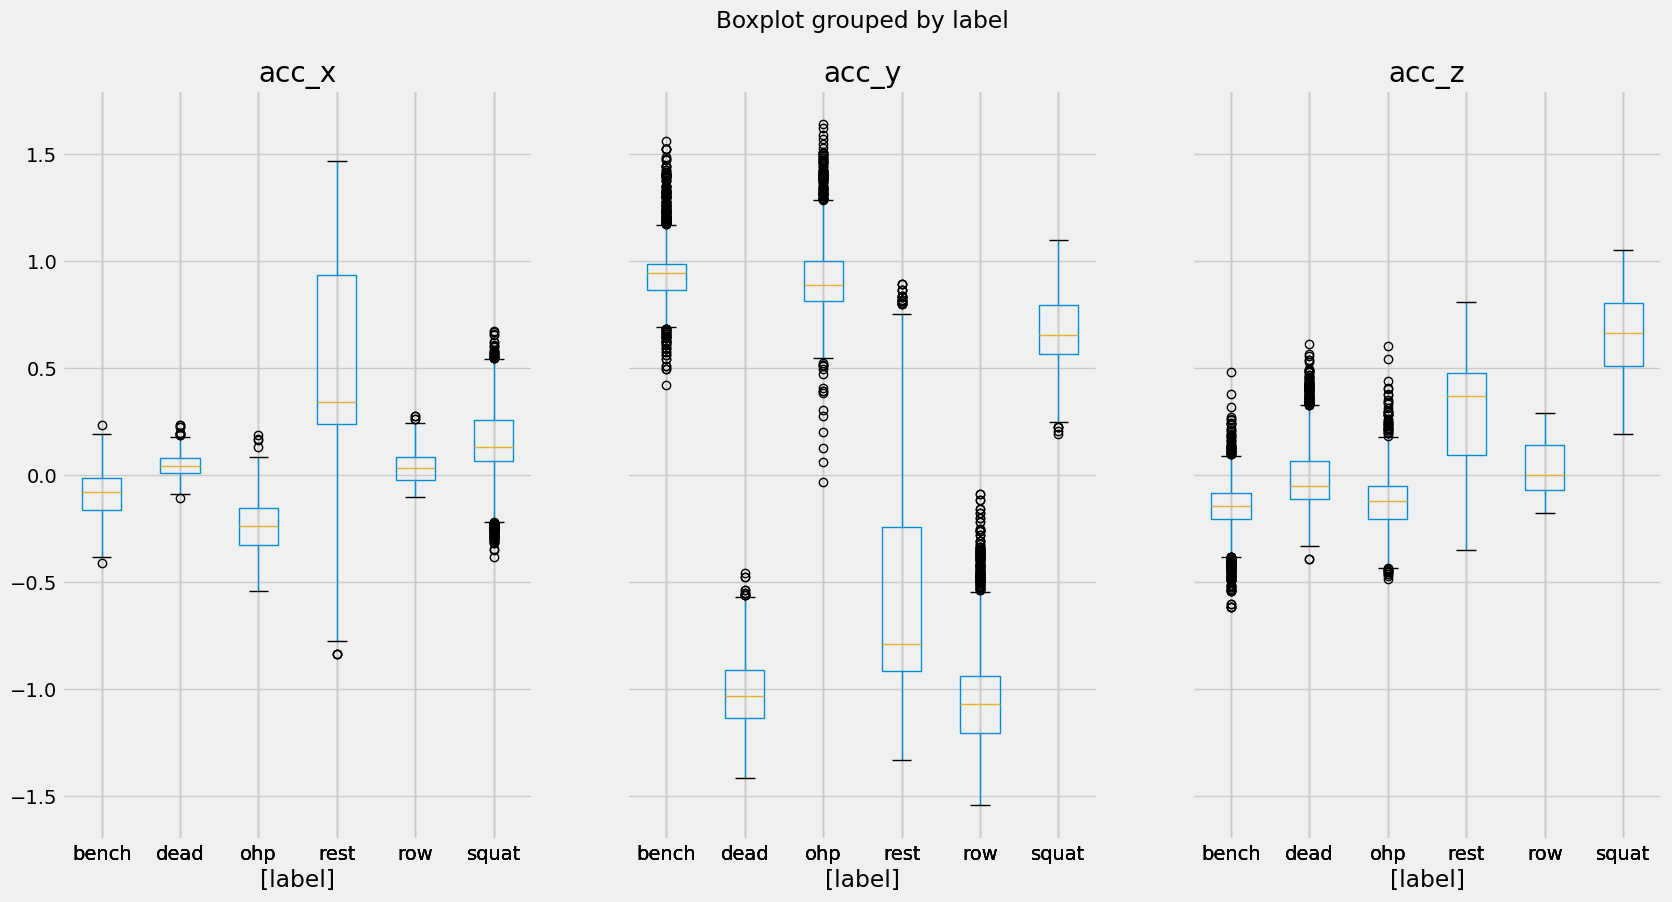

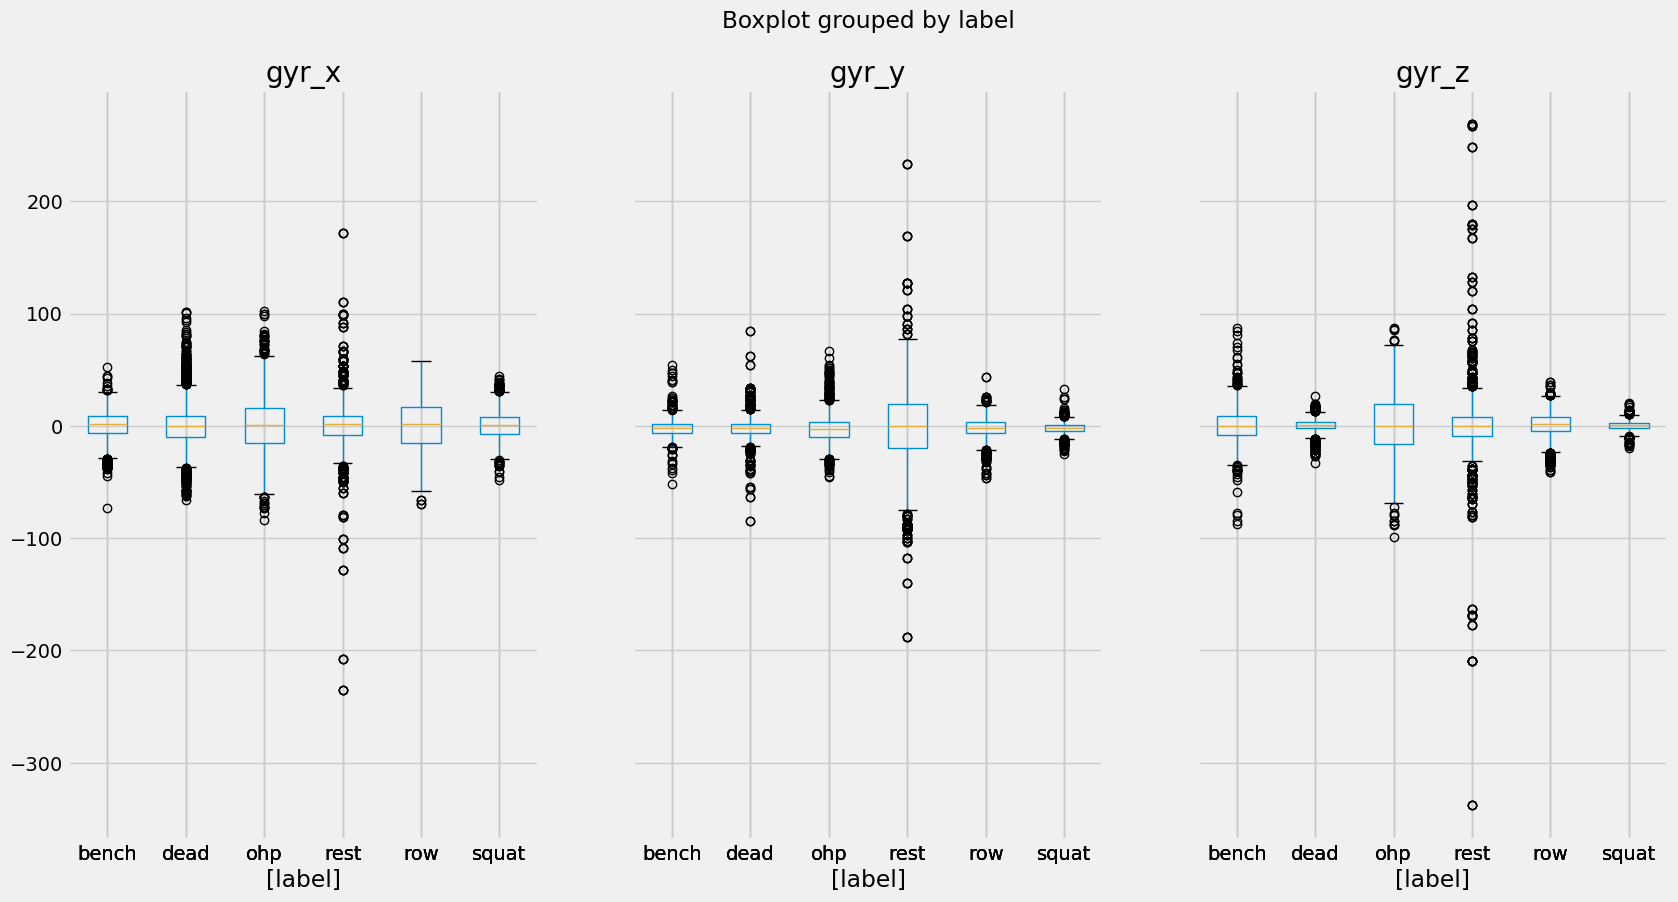

In [28]:
# Plotting acc columns
df[potential_outlier_columns[:3] + ["label"]].boxplot(by="label", figsize=(20,10), layout=(1,3))
plt.show()

# PLotting gyr columns
df[potential_outlier_columns[3:] + ["label"]].boxplot(by="label", figsize=(20,10), layout=(1,3))
plt.show()

## Interquartile Range (distribution based)

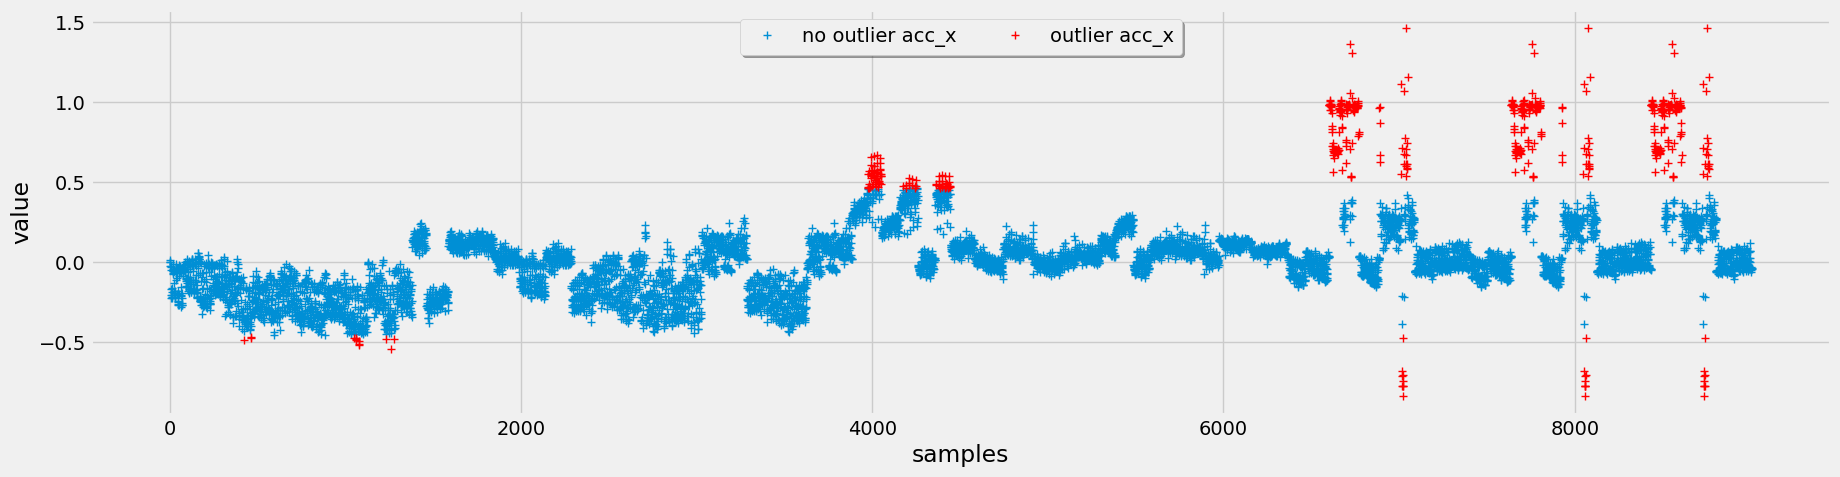

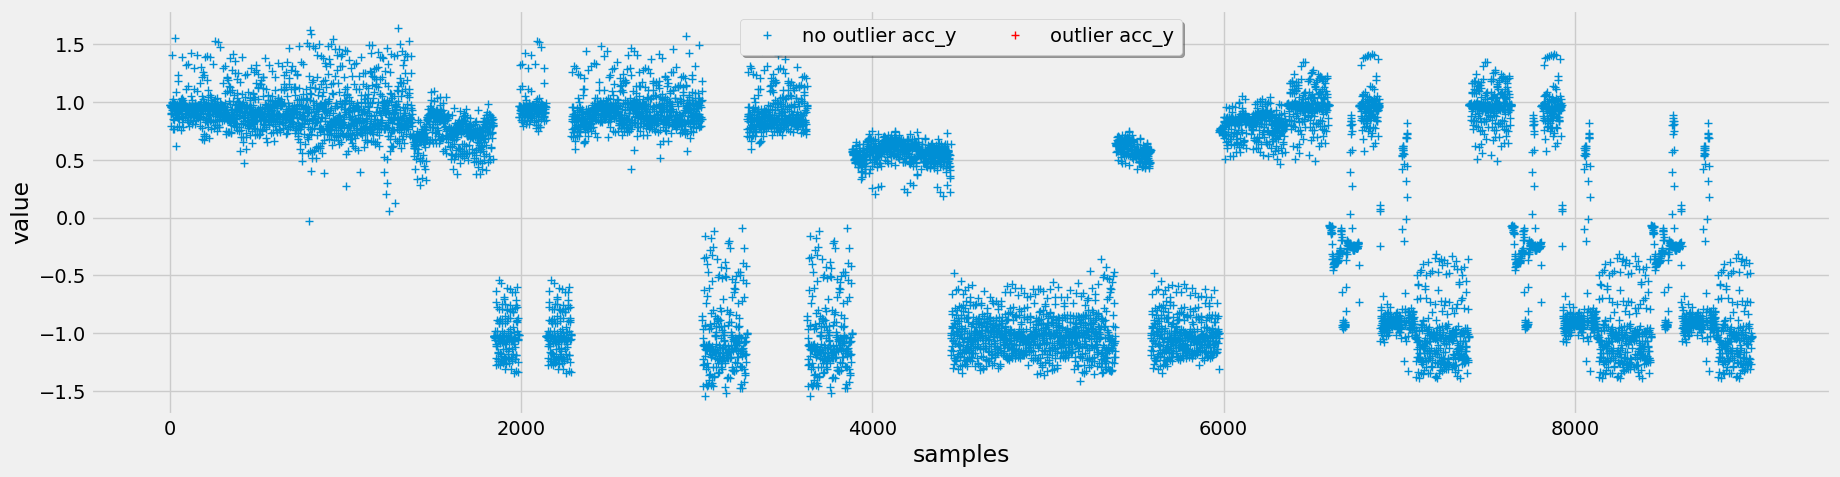

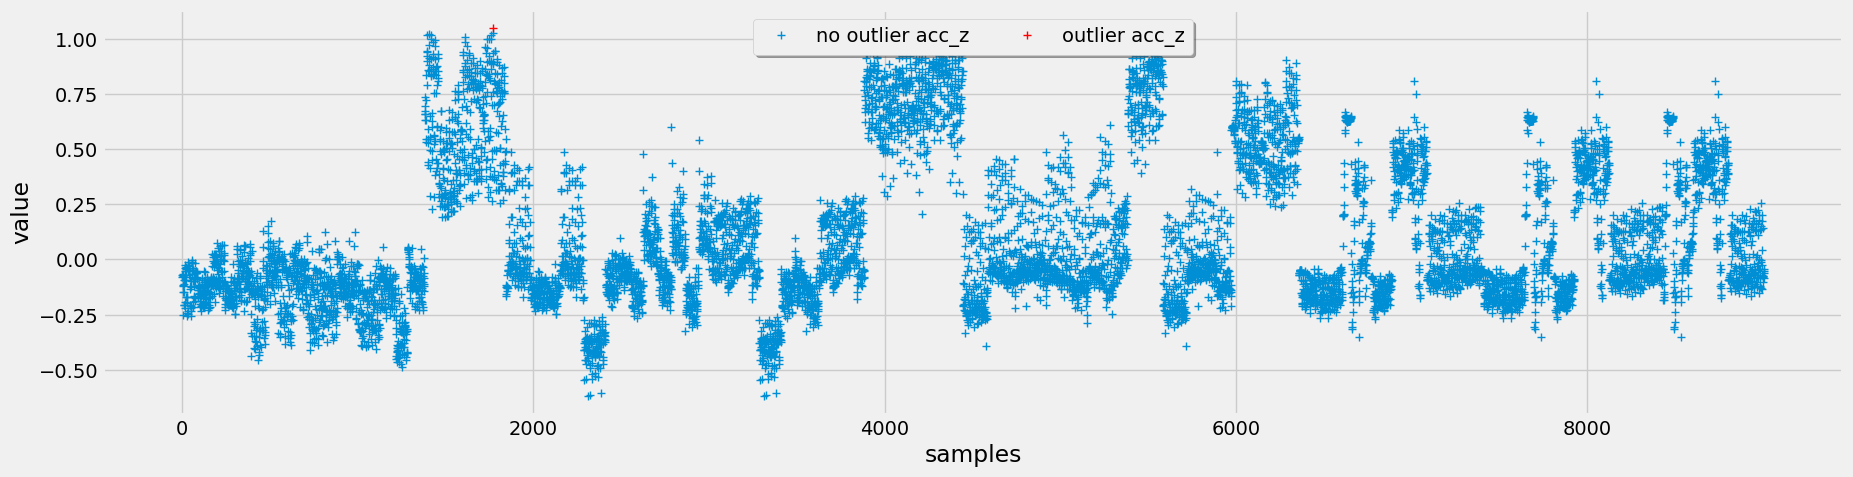

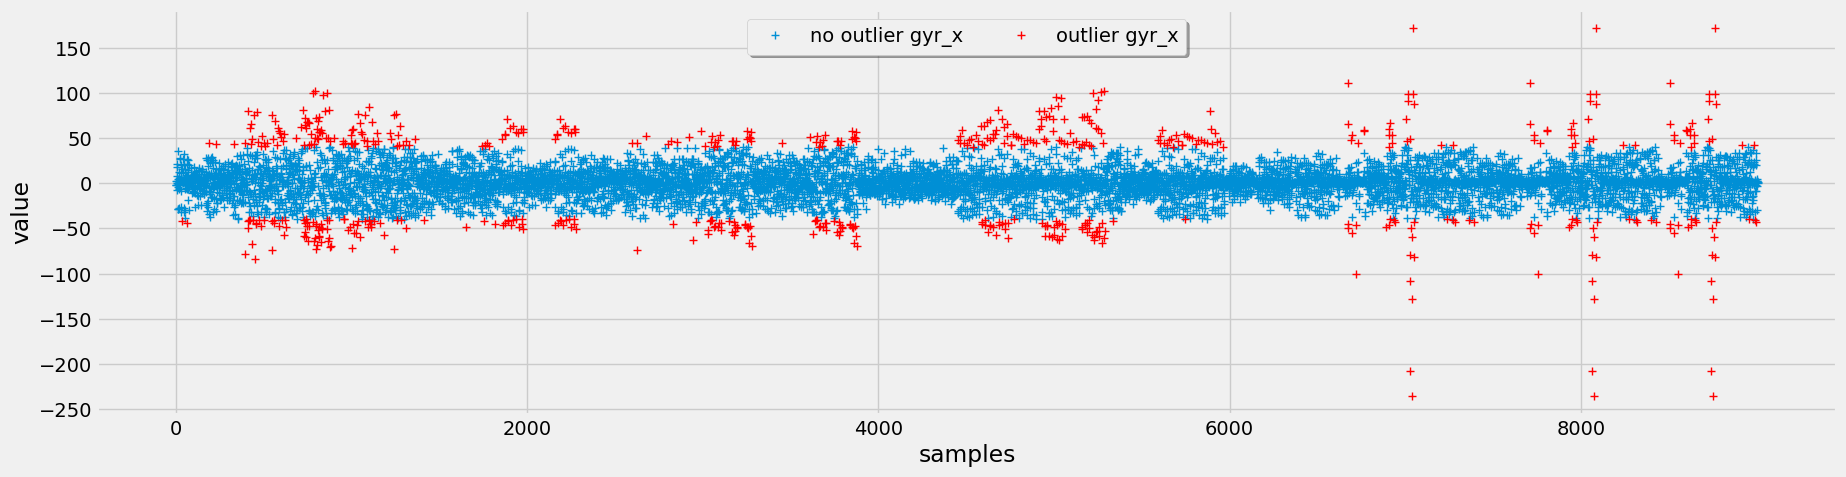

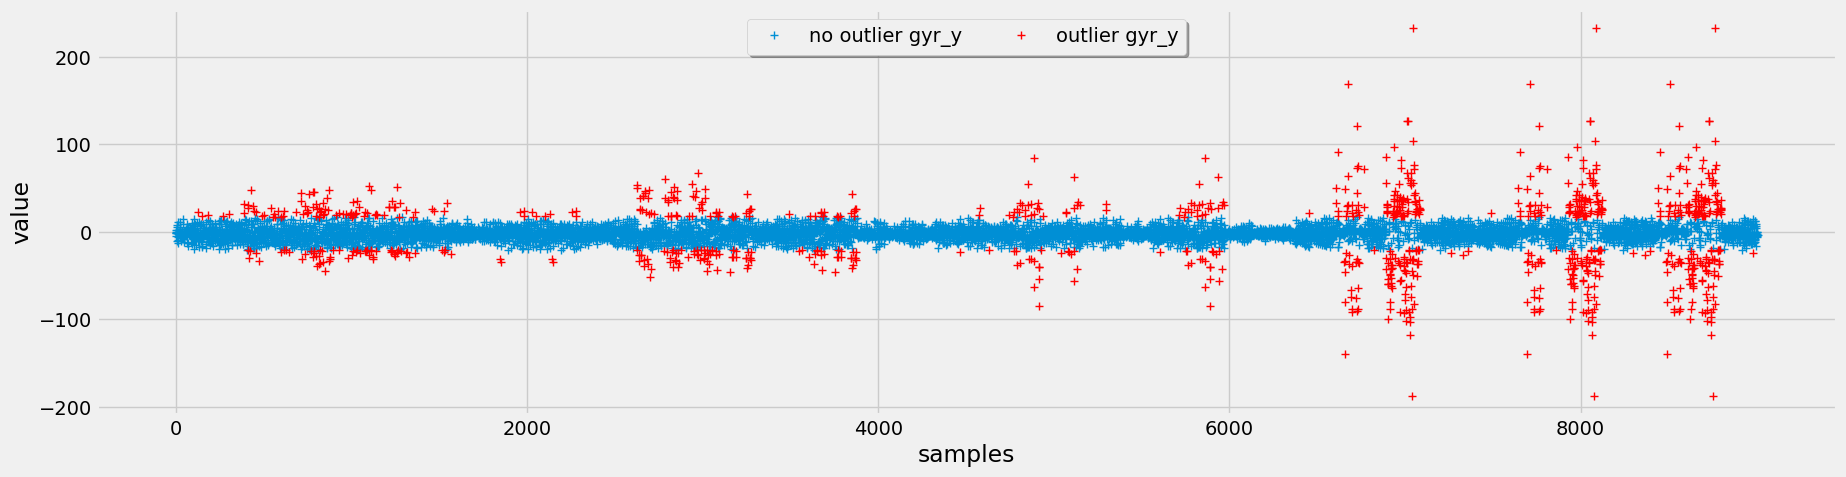

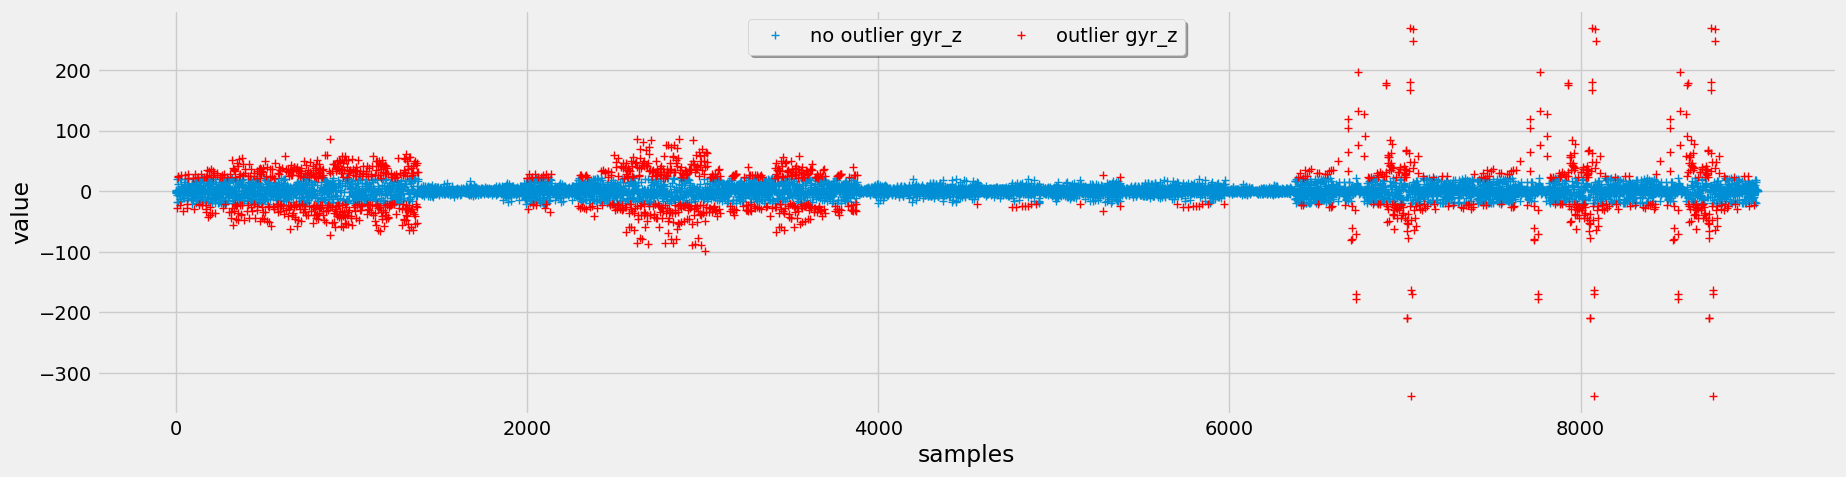

In [29]:
def plot_binary_outliers(dataset, col, outlier_col, reset_index):
    """ Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false (Another function is
        defined in the next section "Interquartile Range" which is required to run first
        in order to run this function)
        reset_index (bool): whether to reset the index for plotting
    """

    # Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    fig, ax = plt.subplots()

    plt.xlabel("samples")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["no outlier " + col, "outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()

# Interquartile range (distribution based)

# Insert IQR function
def mark_outliers_iqr(dataset, col):
    """Function to mark values as outliers using the IQR method.

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()

    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[col + "_outlier"] = (dataset[col] < lower_bound) | (
        dataset[col] > upper_bound
    )

    return dataset

# # Plot a single column
# col = "acc_x"
# dataset = mark_outliers_iqr(df, col)
# plot_binary_outliers(dataset=dataset, col=col, outlier_col=col+"_outlier", reset_index=True)

# Loop over all columns
for col in potential_outlier_columns:
    dataset = mark_outliers_iqr(df, col)
    plot_binary_outliers(dataset=dataset, col=col, outlier_col=col+"_outlier", reset_index=True)


## Chauvenets criteron (distribution based)

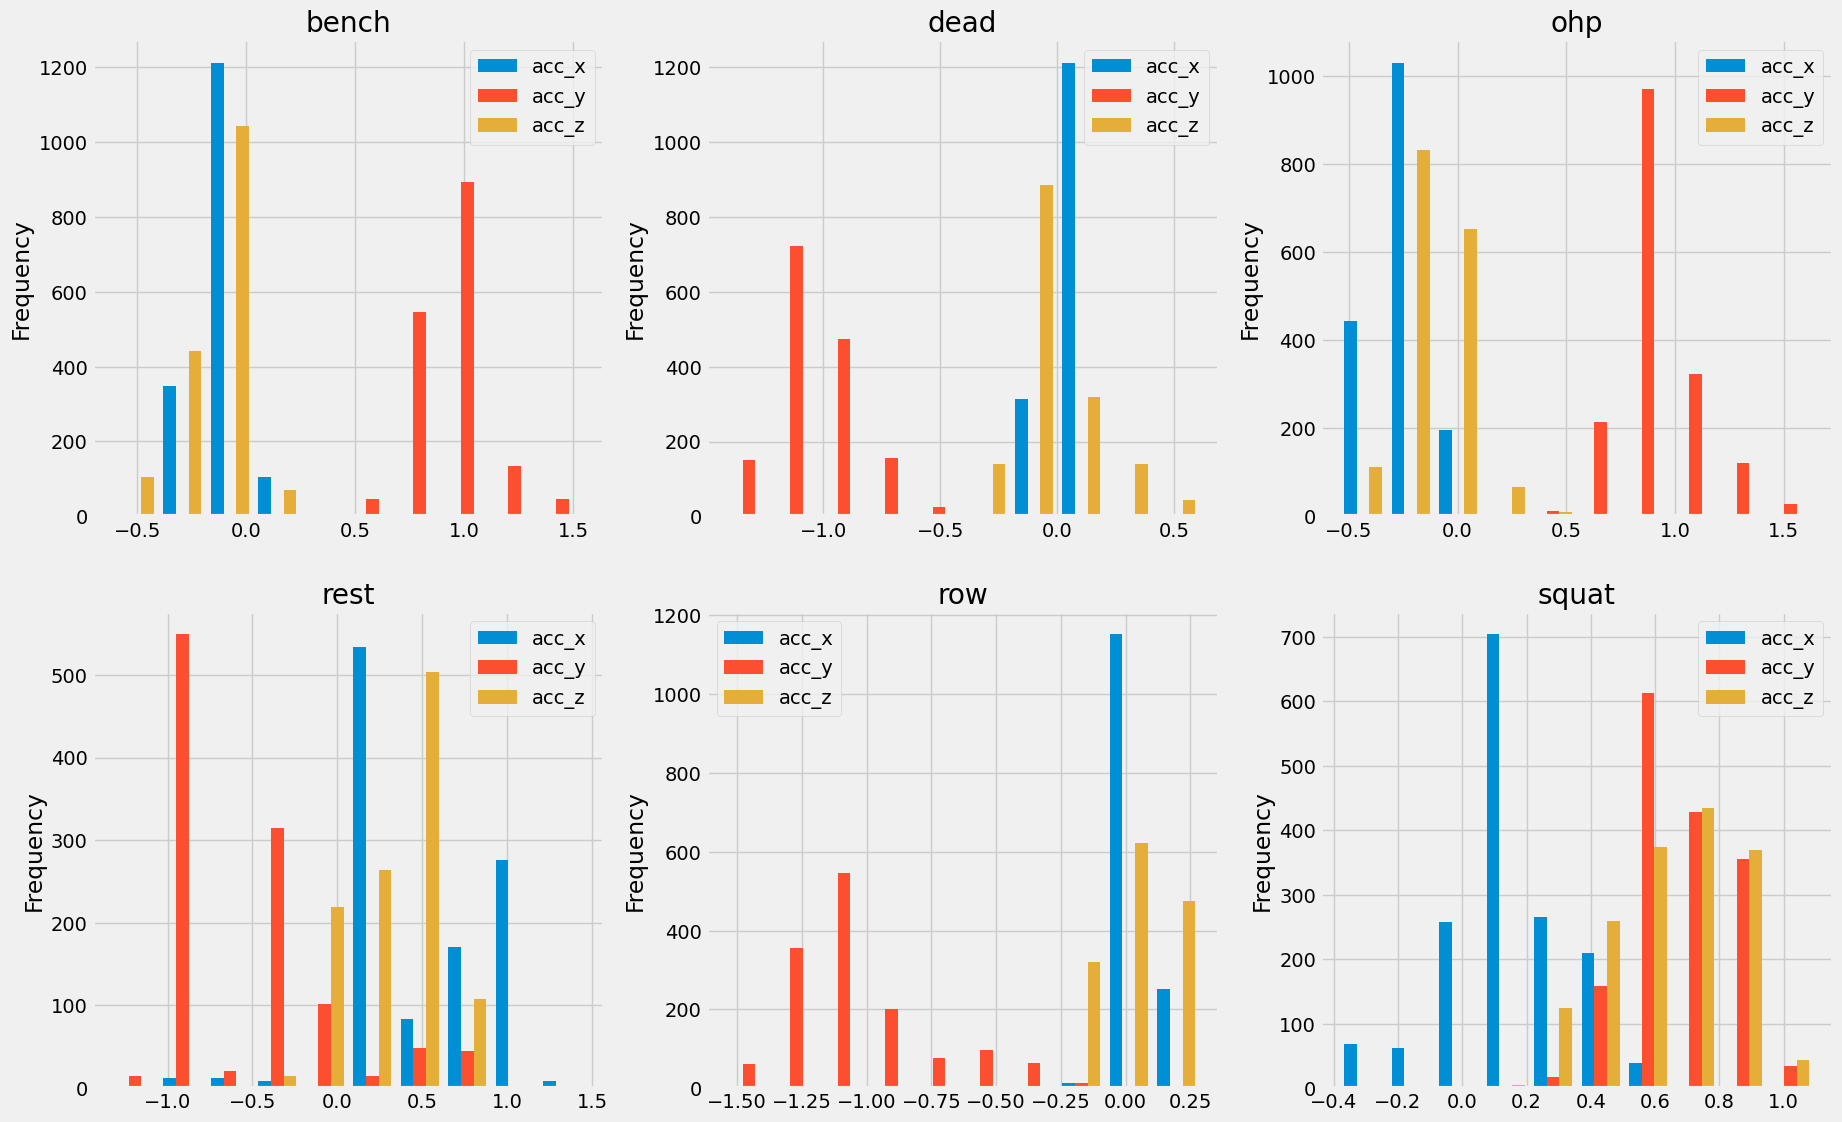

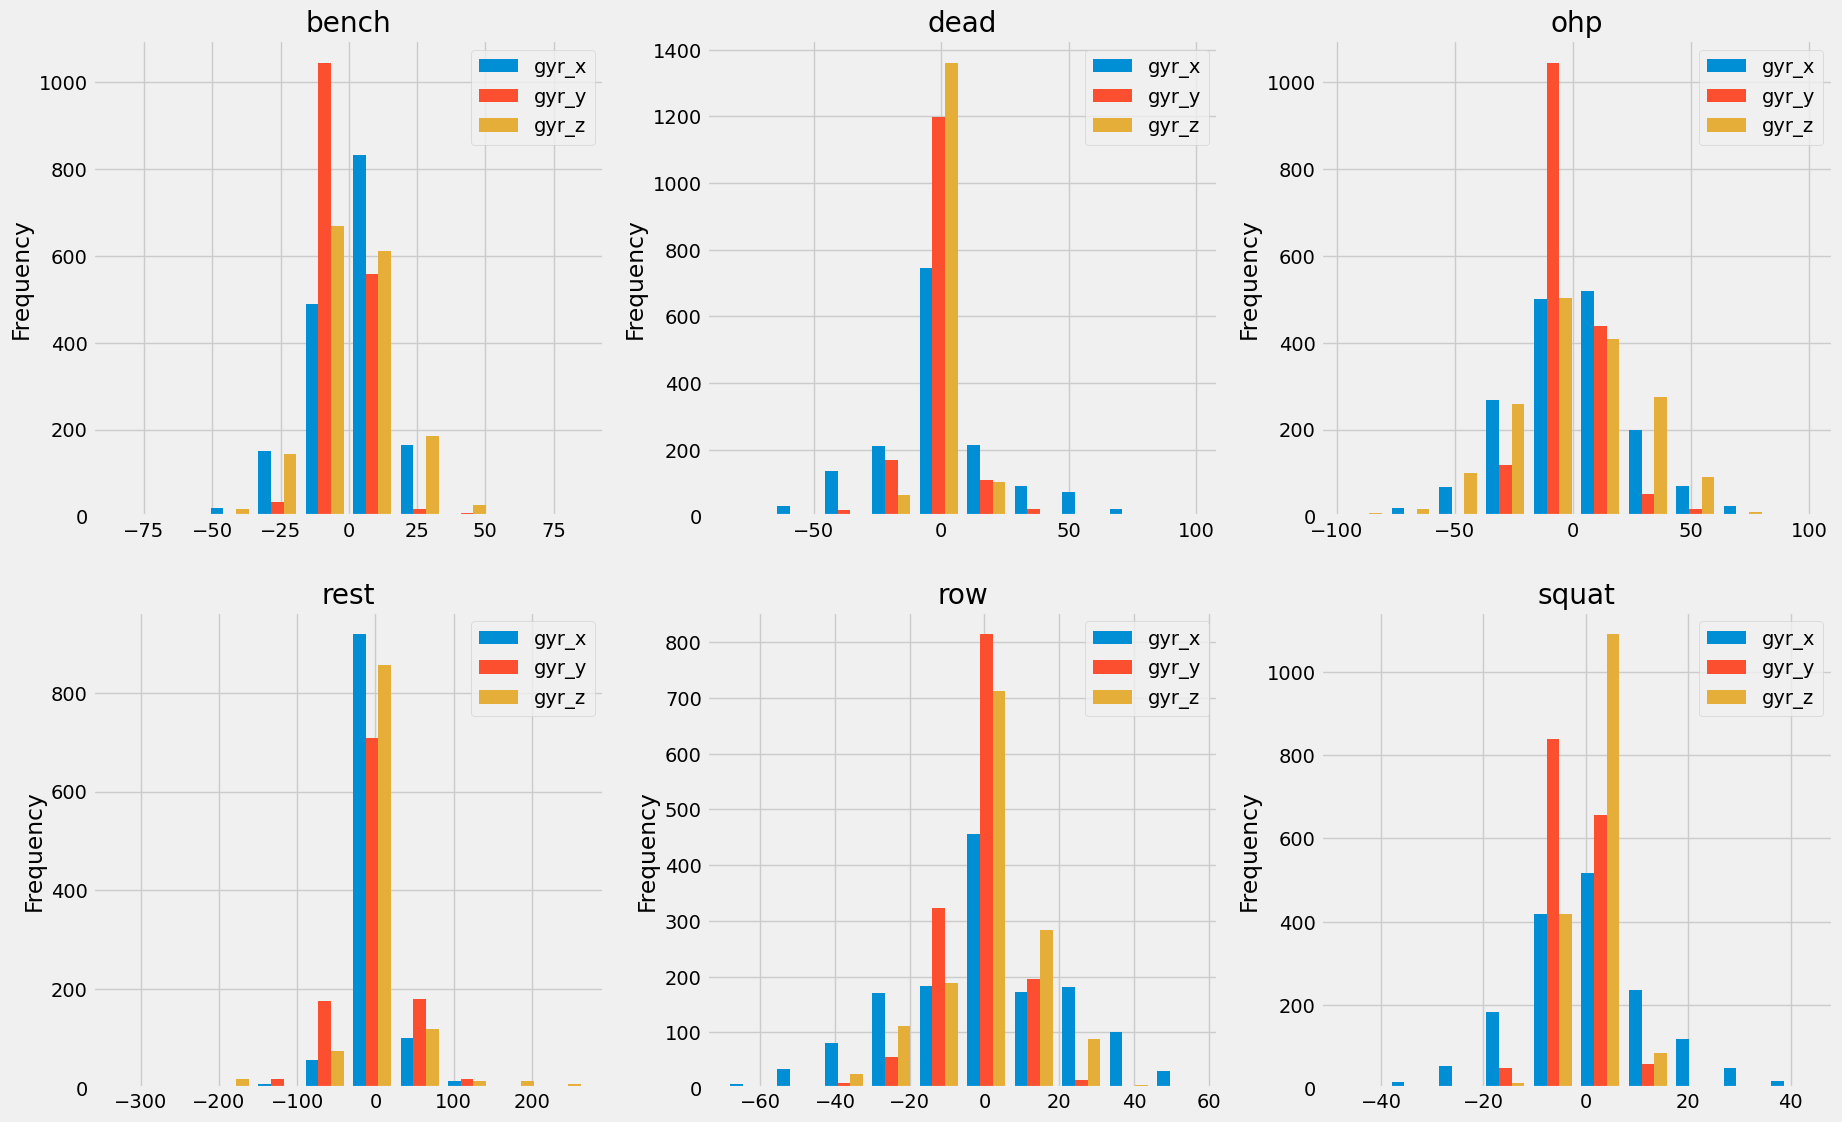

In [30]:
# Check for normal distribution

# Plotting acc columns
df[potential_outlier_columns[:3] + ["label"]].plot.hist(by="label", figsize=(20,20), layout=(3,3))
plt.show()

# PLotting gyr columns
df[potential_outlier_columns[3:] + ["label"]].plot.hist(by="label", figsize=(20,20), layout=(3,3))
plt.show()


/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


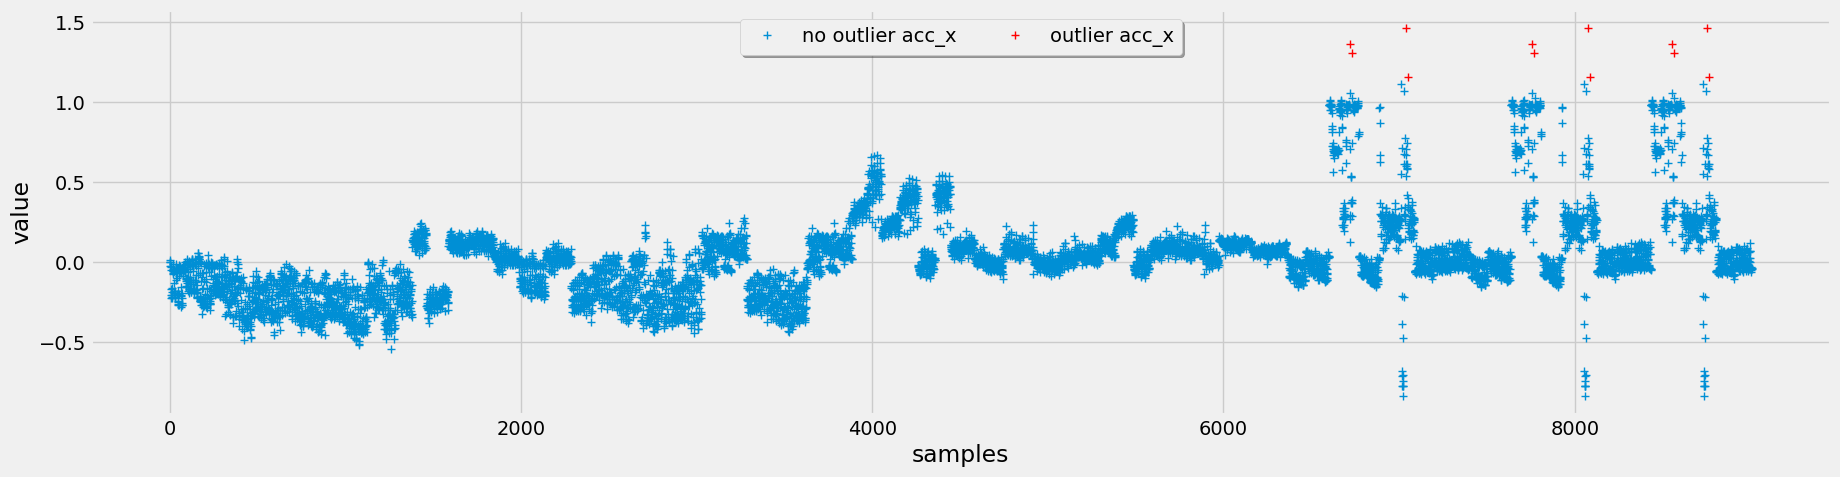

/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


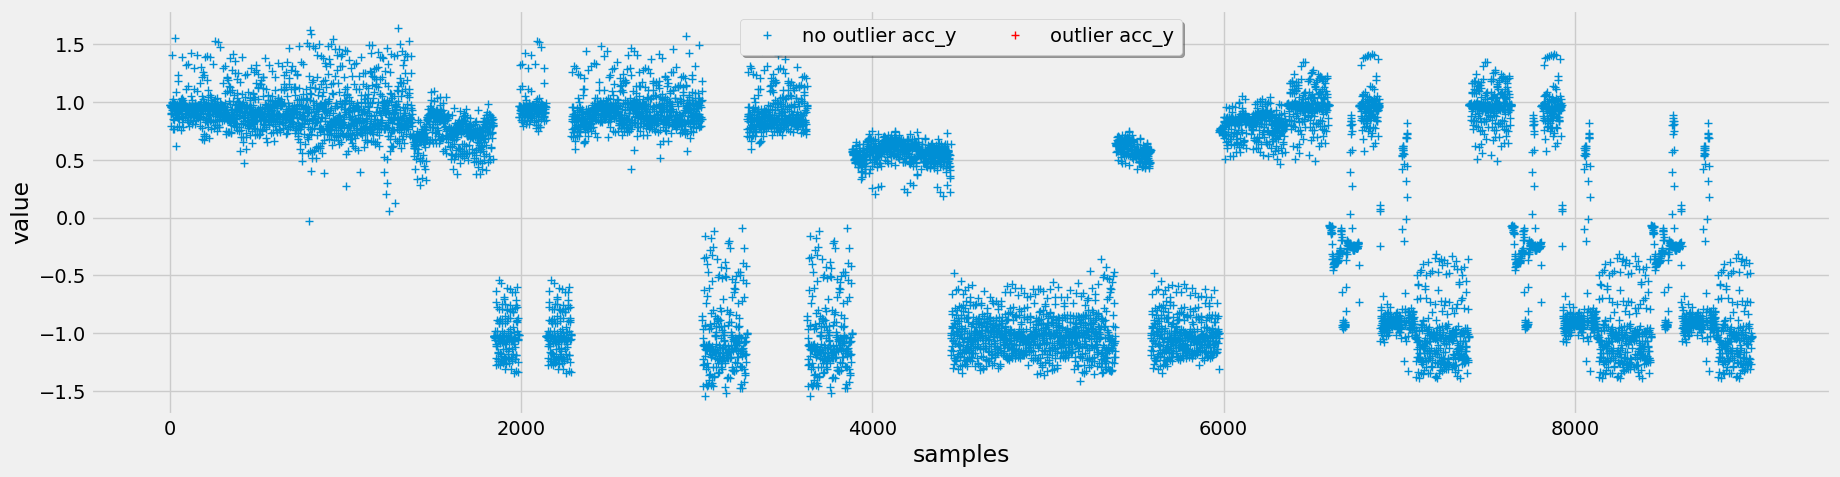

/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


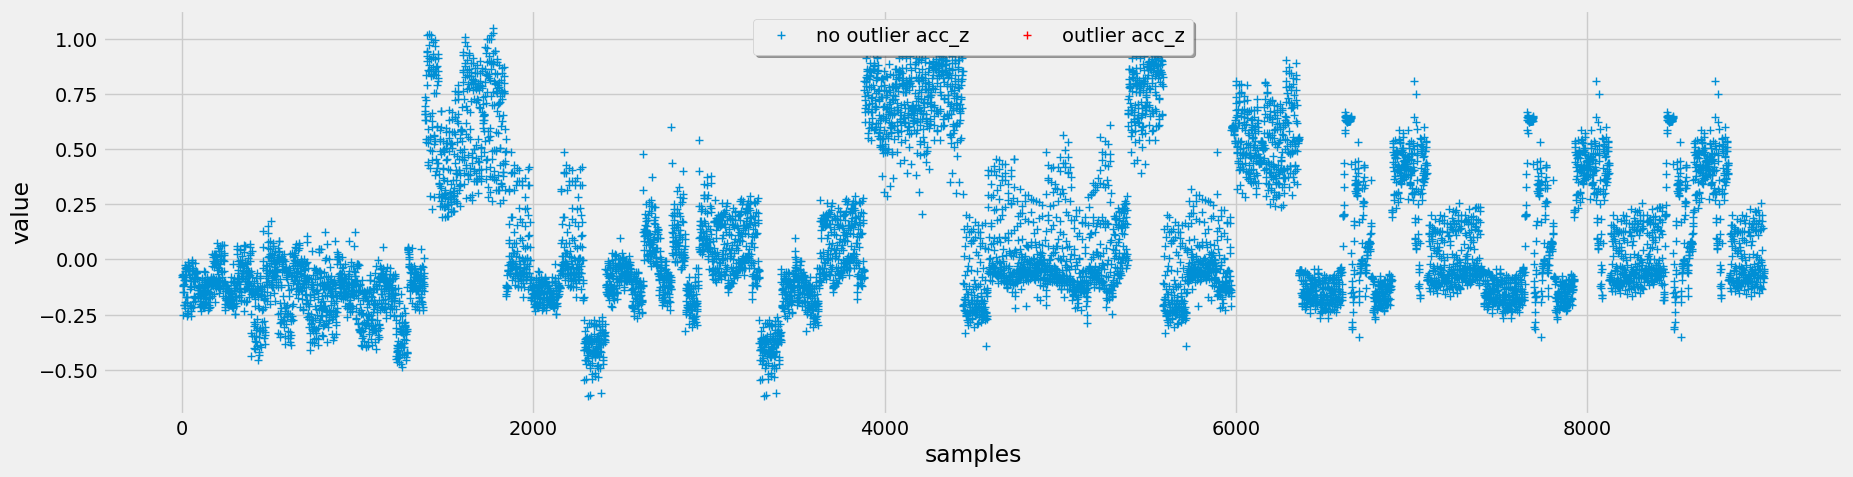

/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


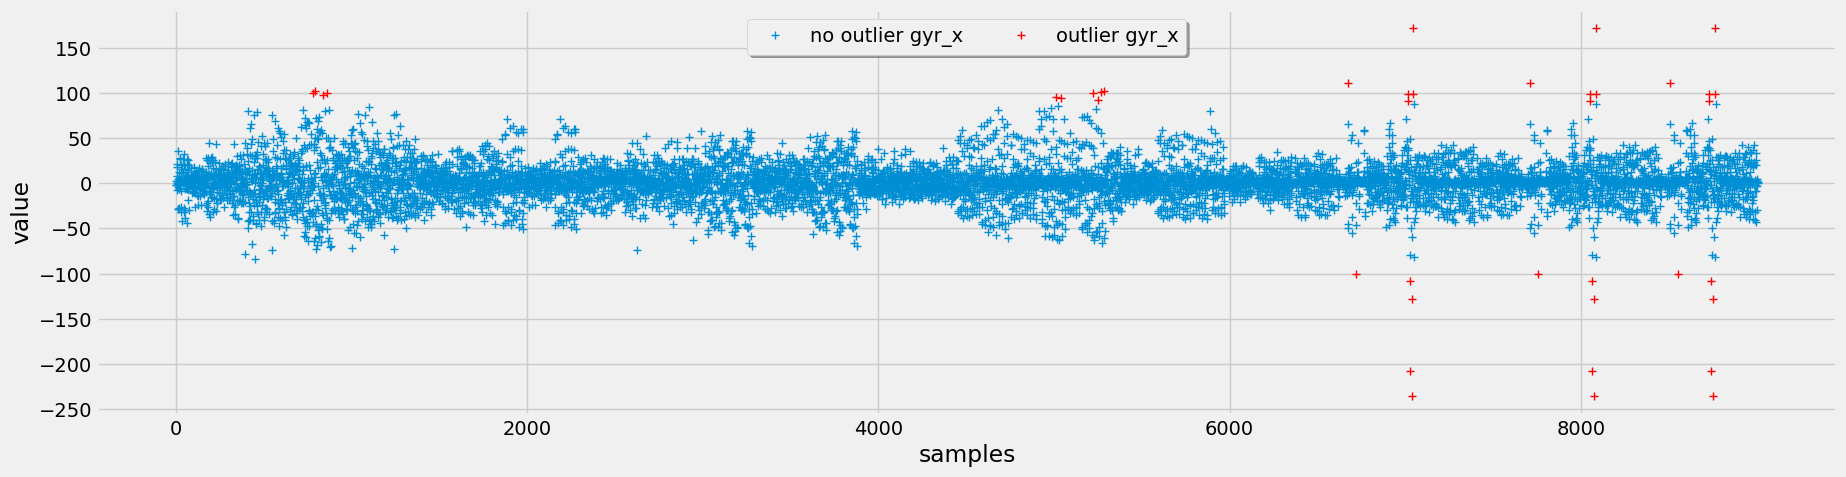

/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


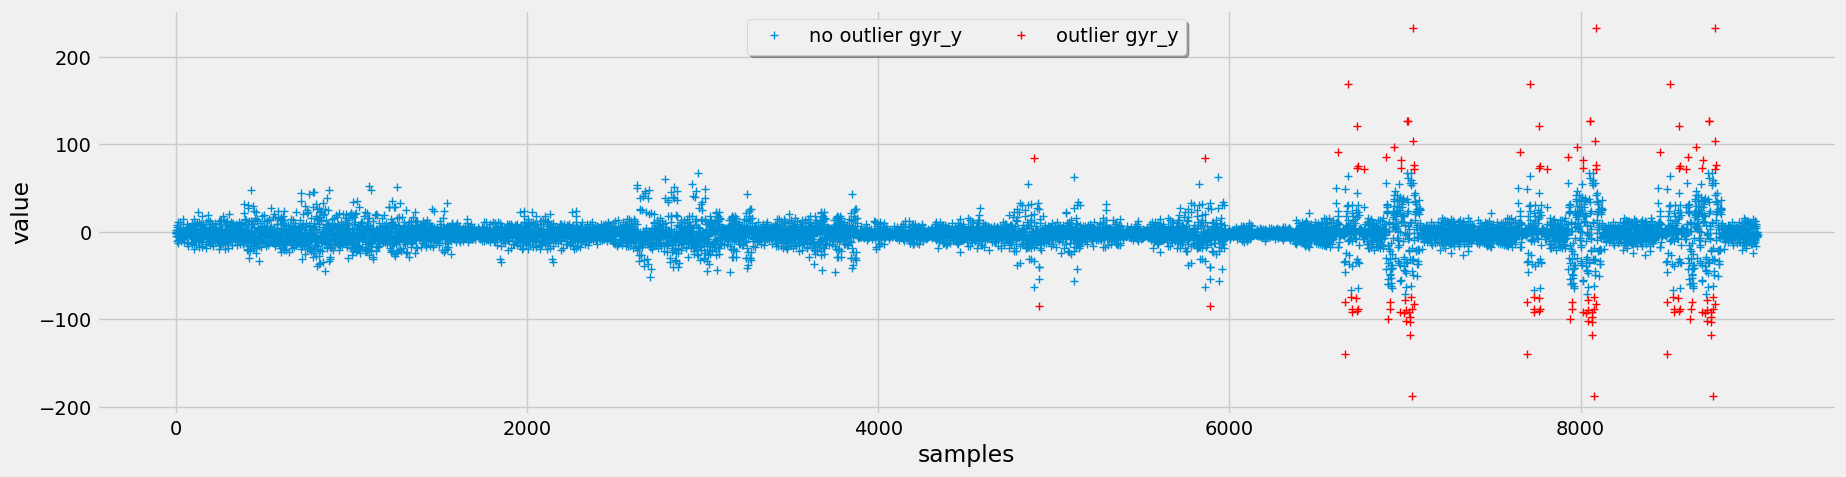

/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))


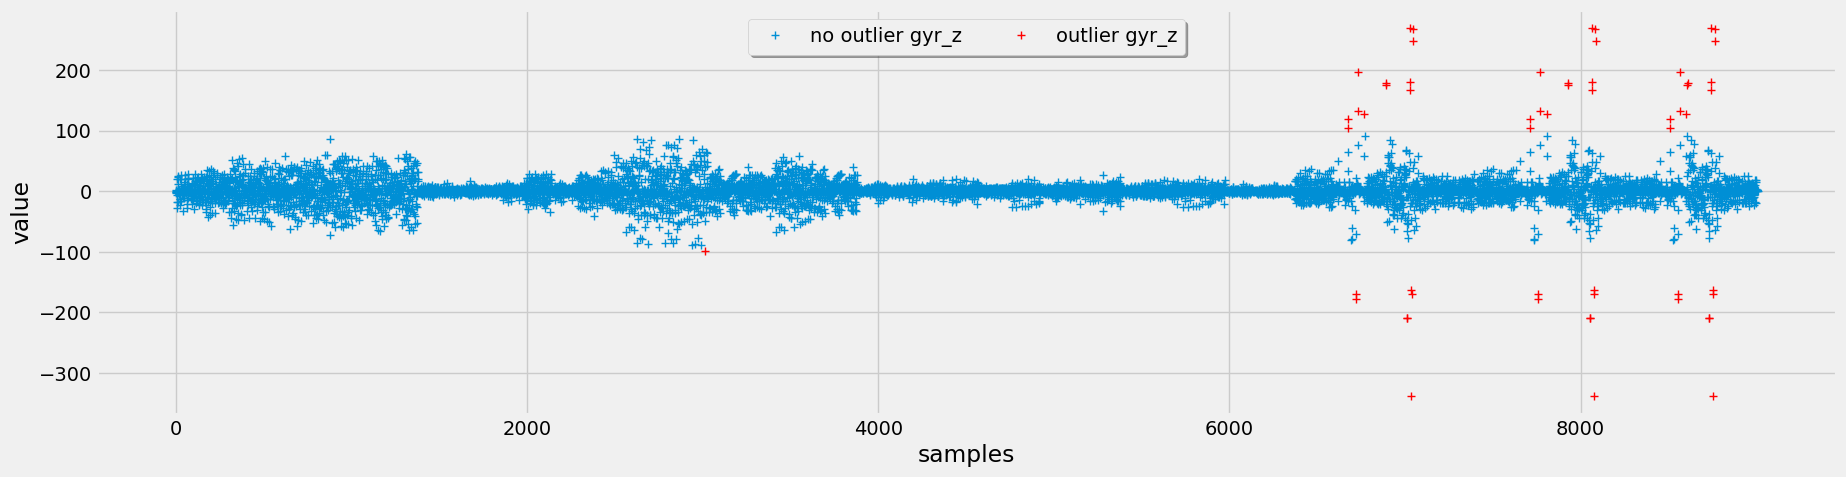

In [31]:
import math
import scipy

# Insert Chauvenet's function
def mark_outliers_chauvenet(dataset, col, C=2):
    """Finds outliers in the specified column of datatable and adds a binary column with
    the same name extended with '_outlier' that expresses the result per data point.
    
    Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/Chapter3/OutlierDetection.py

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        C (int, optional): Degree of certainty for the identification of outliers given the assumption 
                           of a normal distribution, typicaly between 1 - 10. Defaults to 2.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()
    # Compute the mean and standard deviation.
    mean = dataset[col].mean()
    std = dataset[col].std()
    N = len(dataset.index)
    criterion = 1.0 / (C * N)

    # Consider the deviation for the data points.
    deviation = abs(dataset[col] - mean) / std

    # Express the upper and lower bounds.
    low = -deviation / math.sqrt(C)
    high = deviation / math.sqrt(C)
    prob = []
    mask = []

    # Pass all rows in the dataset.
    for i in range(0, len(dataset.index)):
        # Determine the probability of observing the point
        prob.append(
            1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
        )
        # And mark as an outlier when the probability is below our criterion.
        mask.append(prob[i] < criterion)
    dataset[col + "_outlier"] = mask
    return dataset

# Loop over all columns
for col in potential_outlier_columns:
    dataset = mark_outliers_chauvenet(df, col)
    plot_binary_outliers(dataset=dataset, col=col, outlier_col=col+"_outlier", reset_index=True)


## Local outlier factor (distance based)


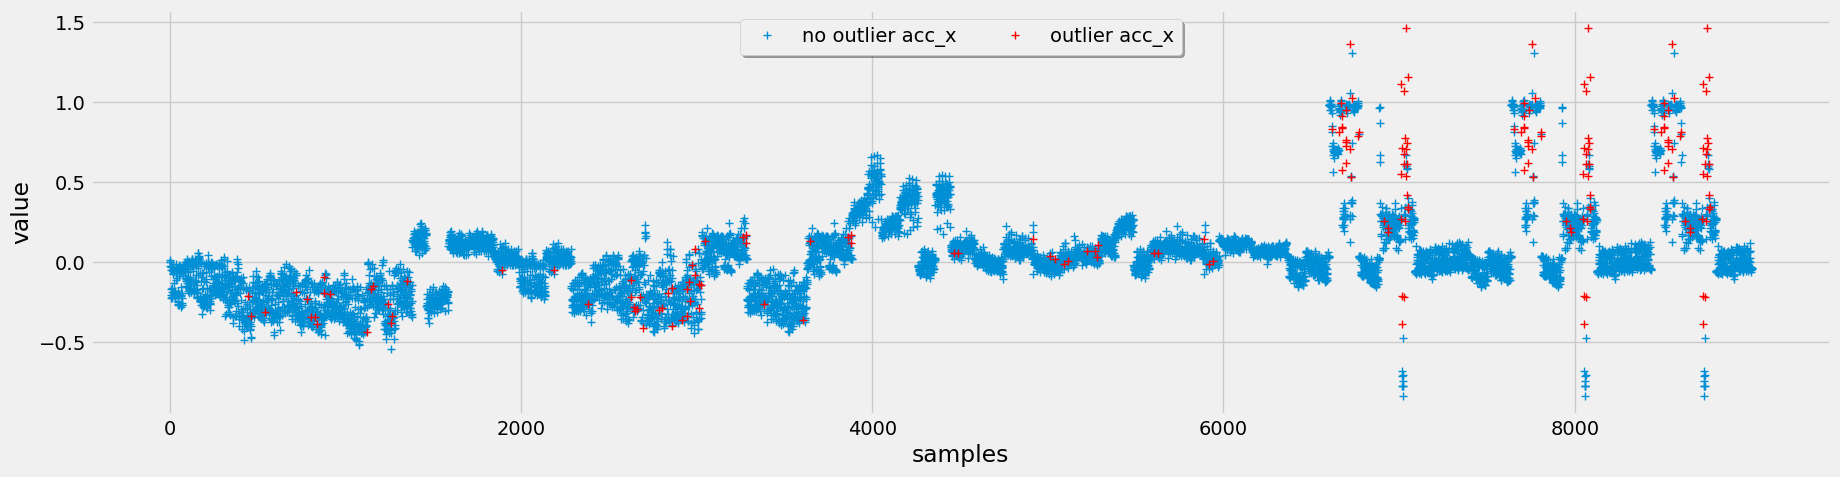

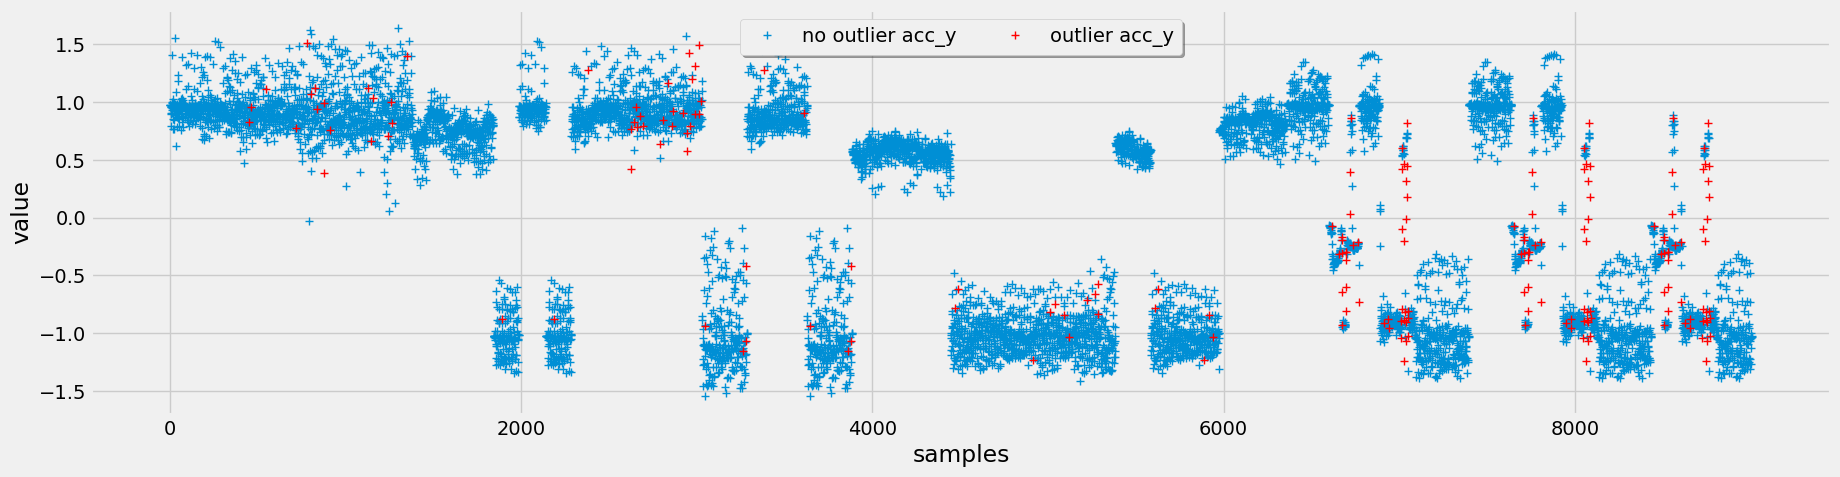

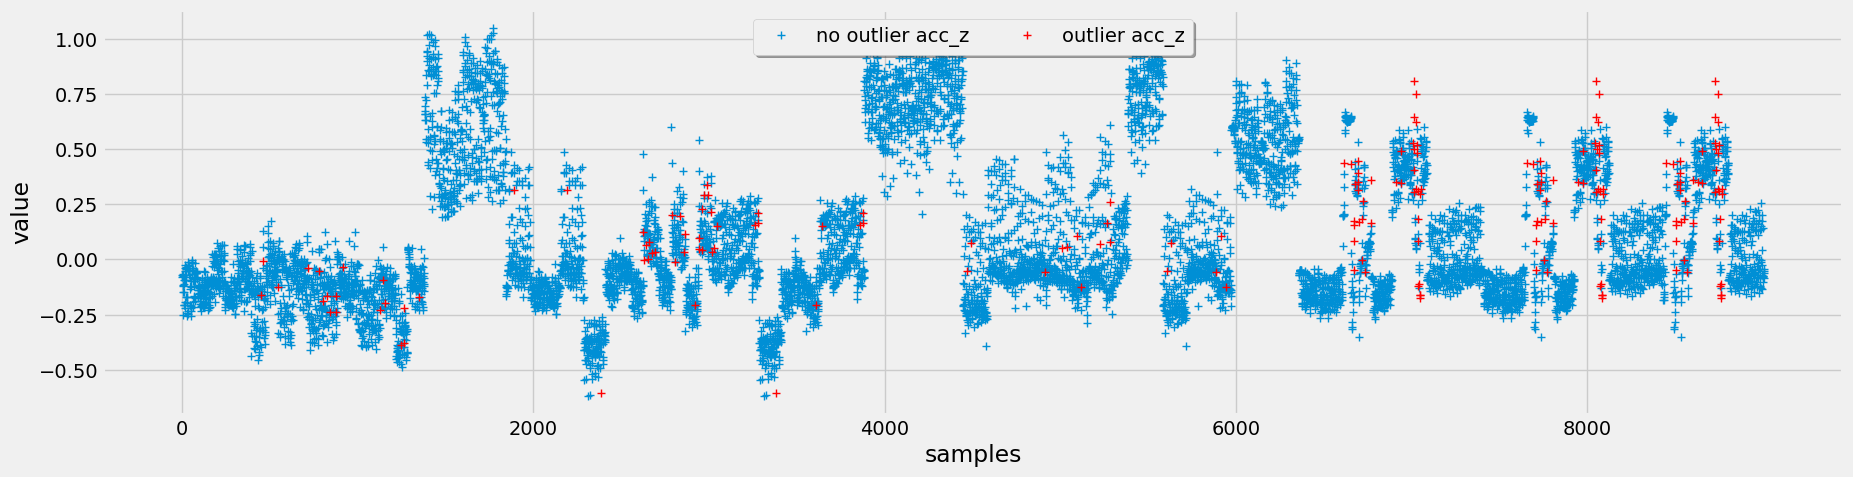

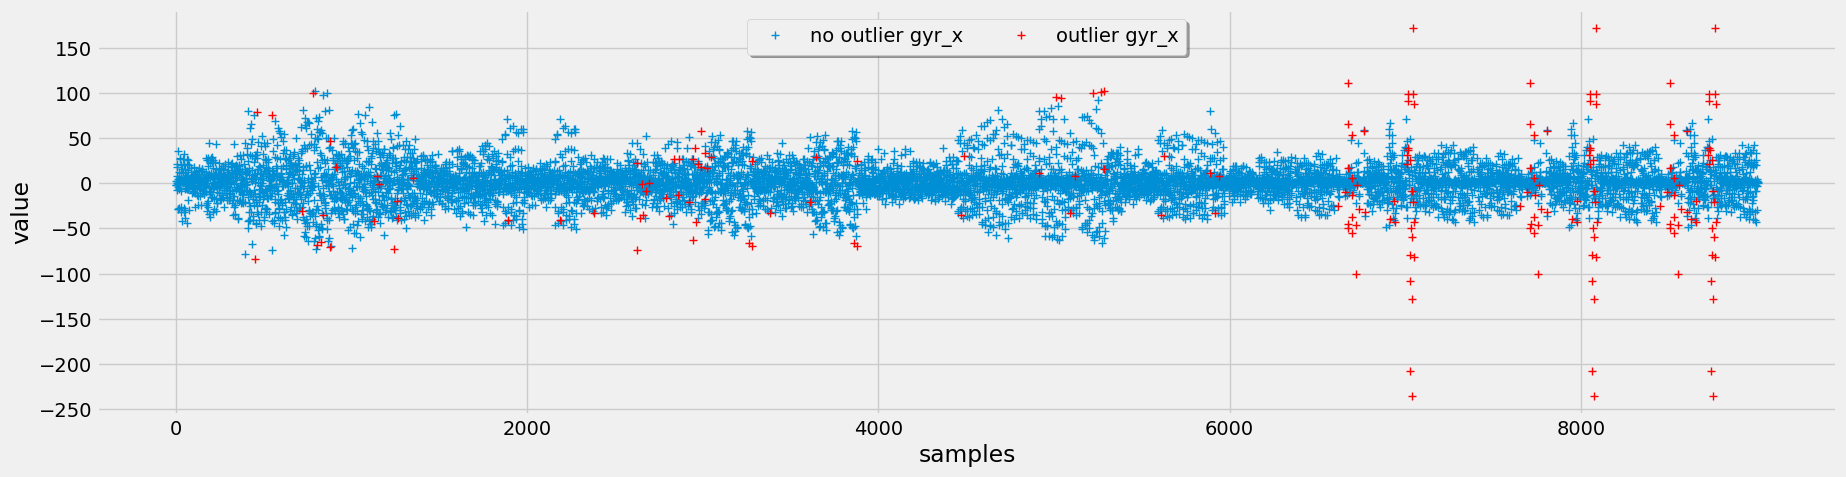

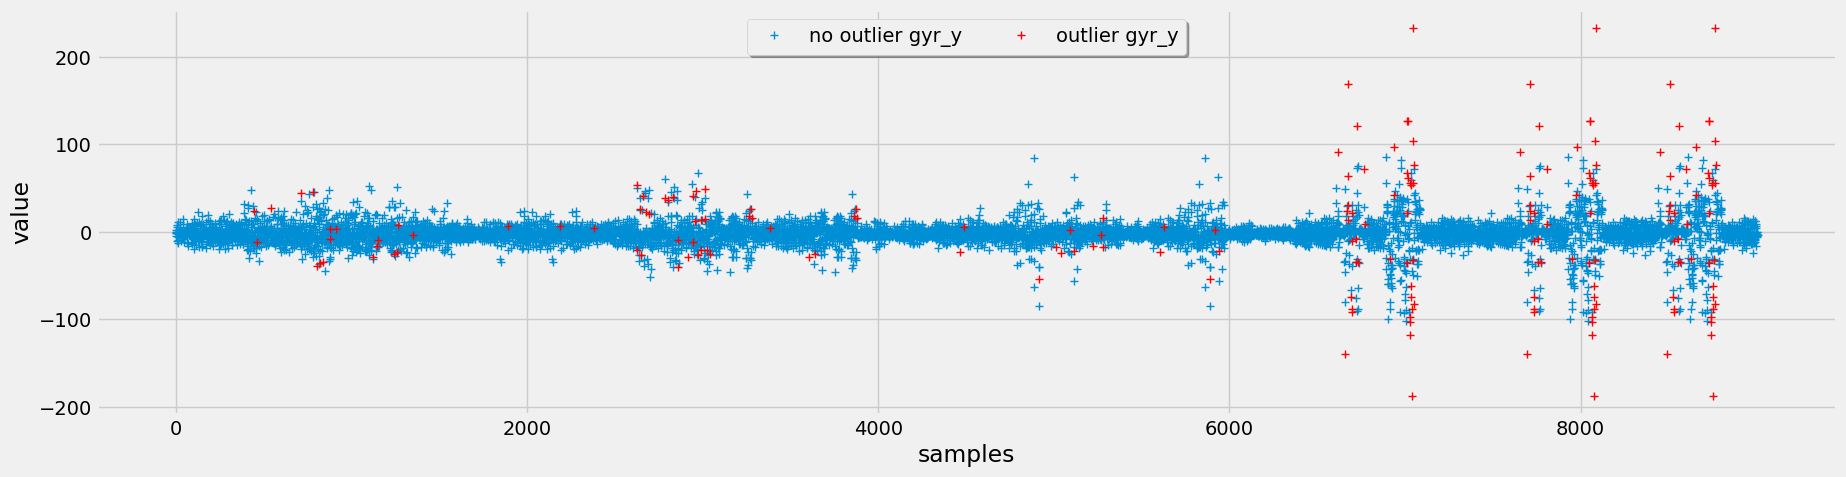

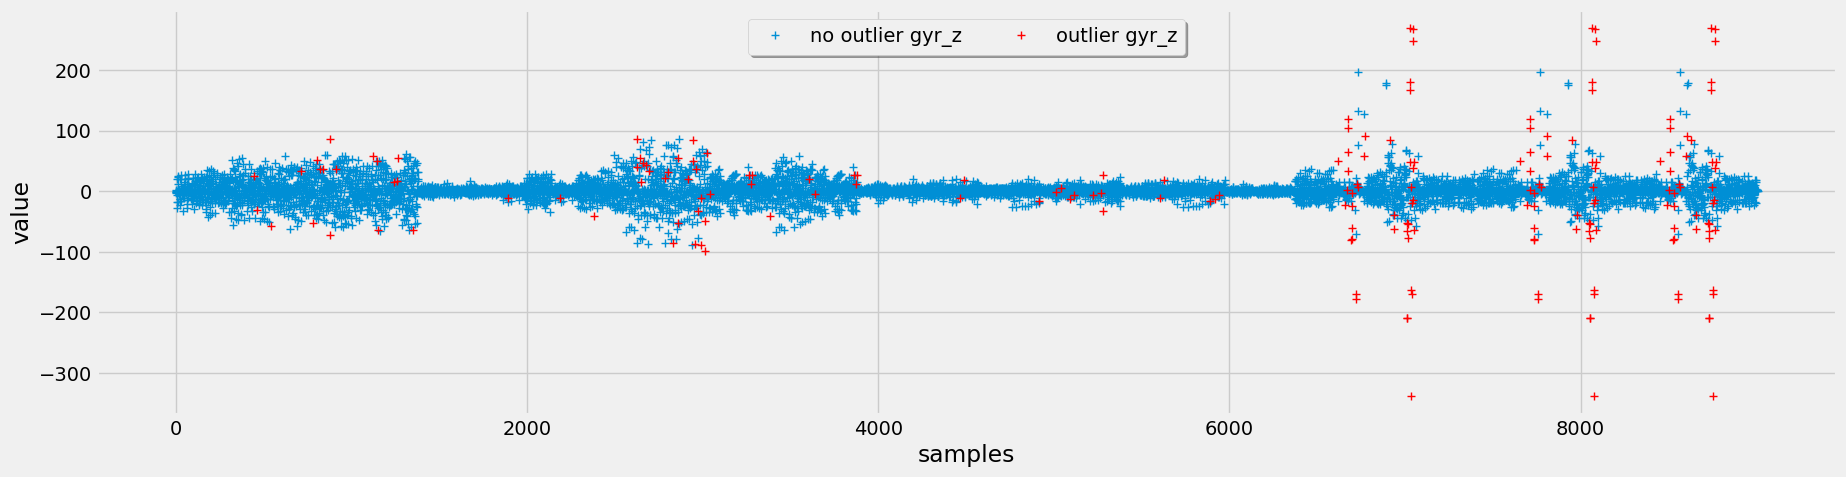

In [32]:
from sklearn.neighbors import LocalOutlierFactor  # pip install scikit-learn


# Local outlier factor (distance based)

# Insert LOF function
def mark_outliers_lof(dataset, columns, n=20):
    """Mark values as outliers using LOF

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        n (int, optional): n_neighbors. Defaults to 20.
    
    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column
        indicating whether the value is an outlier or not.
    """
    
    dataset = dataset.copy()

    lof = LocalOutlierFactor(n_neighbors=n)
    data = dataset[columns]
    outliers = lof.fit_predict(data)
    X_scores = lof.negative_outlier_factor_

    dataset["outlier_lof"] = outliers == -1
    return dataset, outliers, X_scores

# Loop over all columns
dataset, outliers, X_scores = mark_outliers_lof(df, potential_outlier_columns)
for col in potential_outlier_columns:
    plot_binary_outliers(dataset=dataset ,col=col, outlier_col="outlier_lof", reset_index=True)



## Check outliers grouped by label

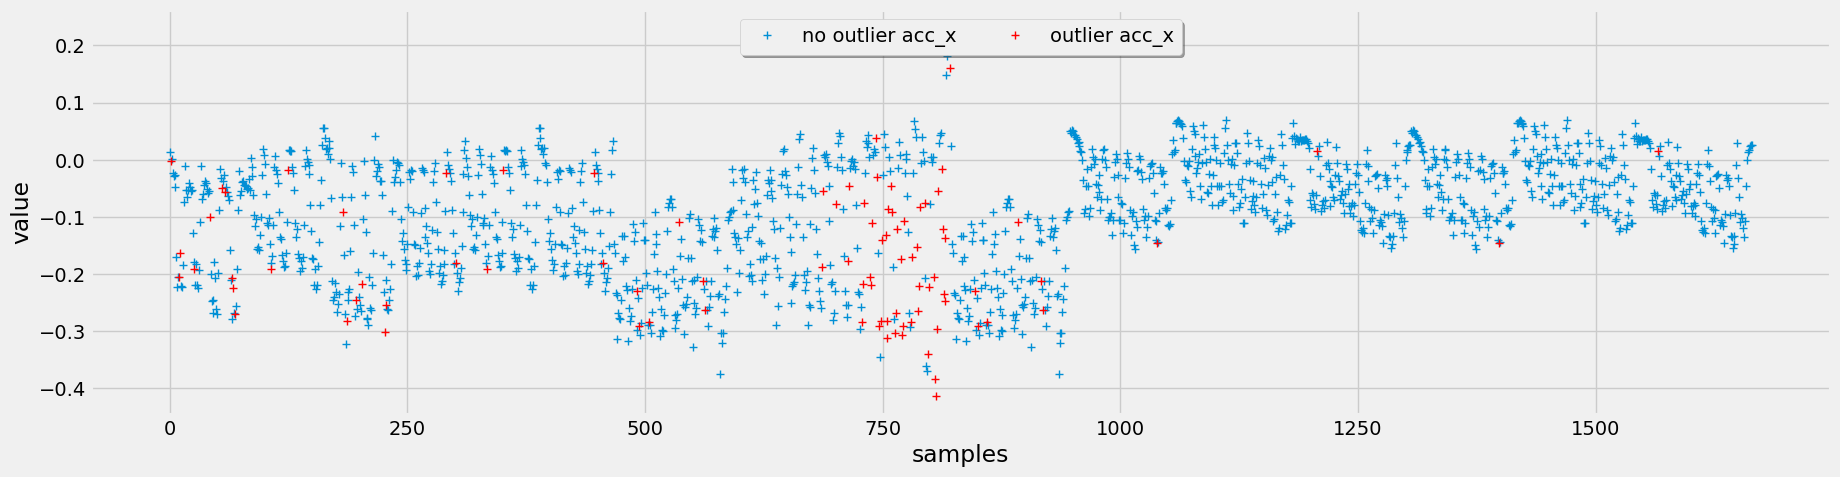

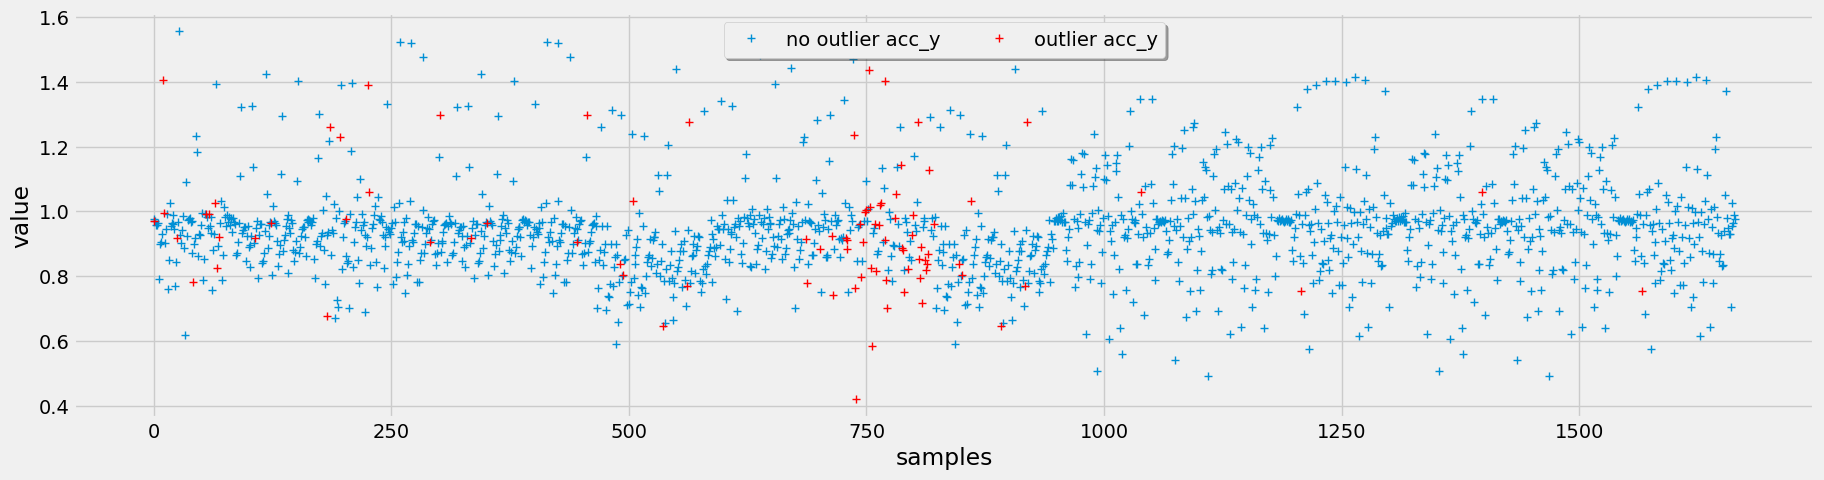

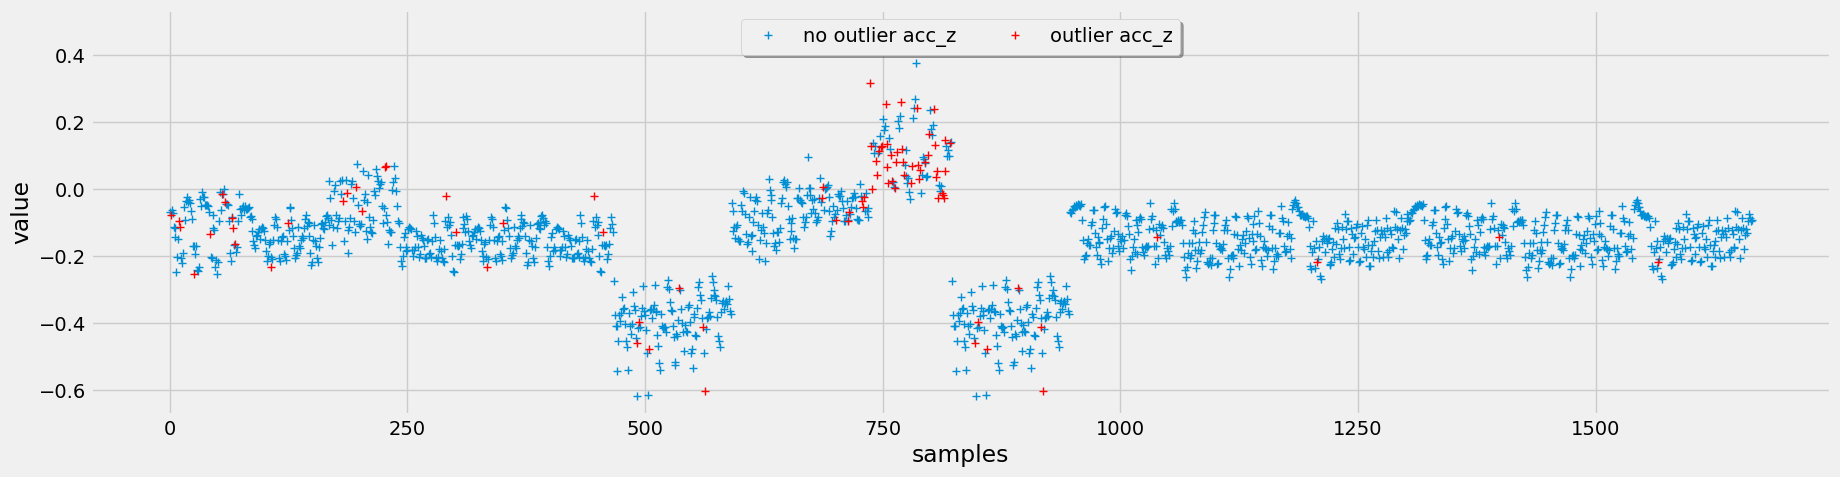

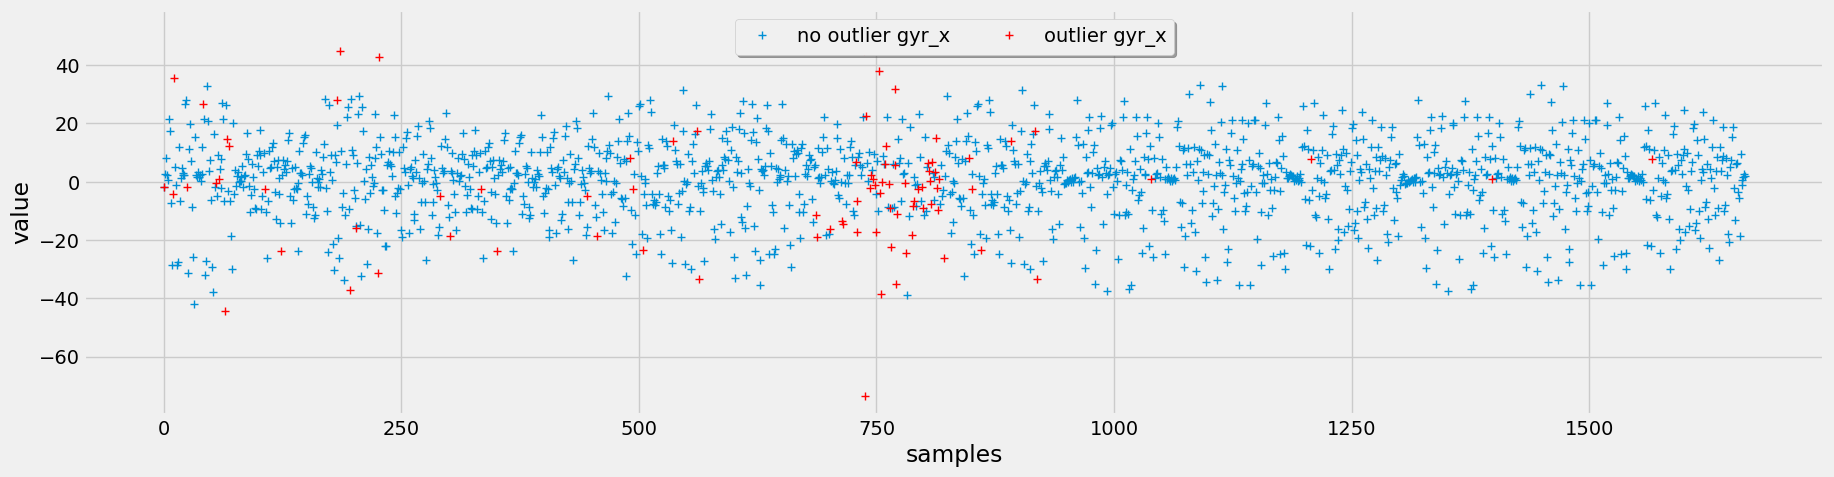

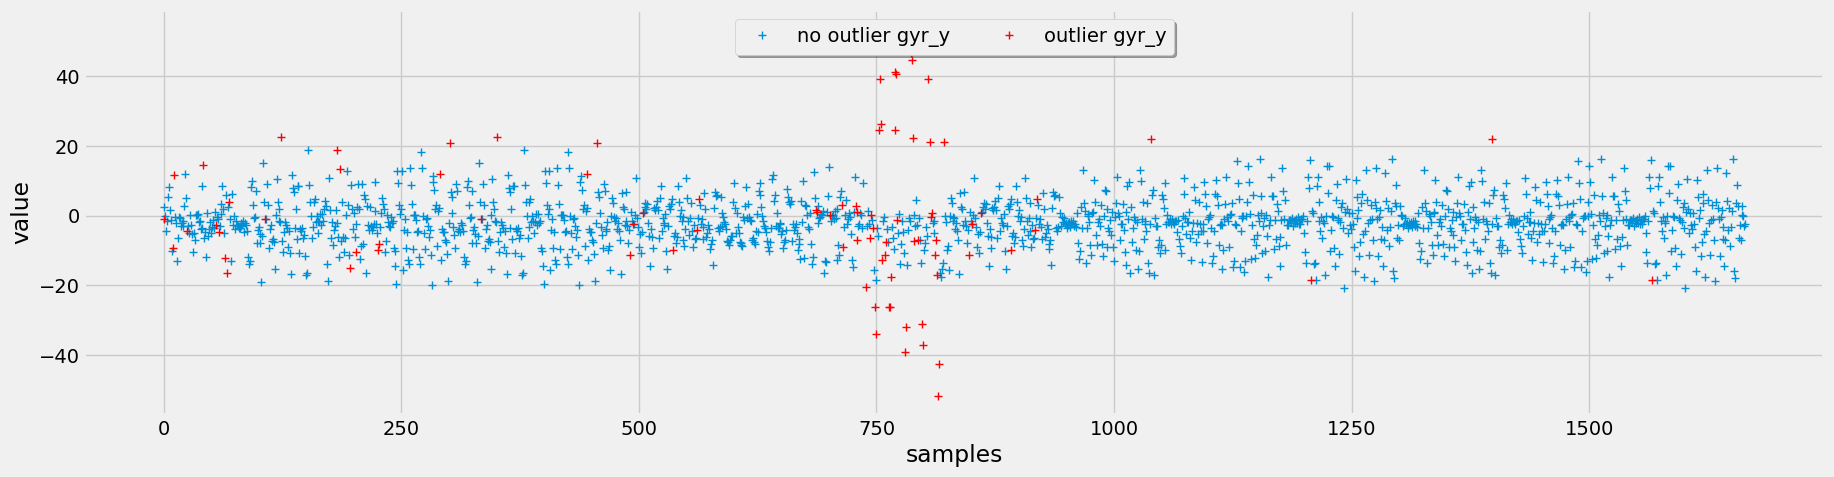

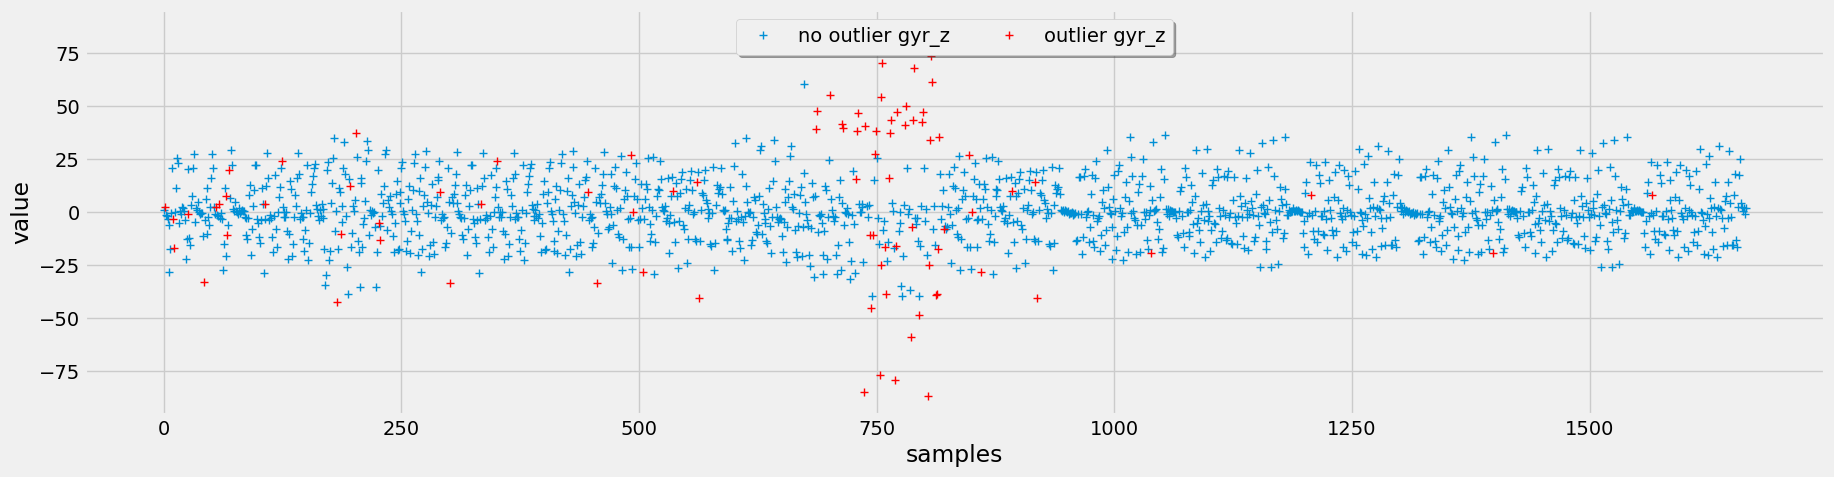

In [33]:
label = "bench"

# # IQR
# for col in potential_outlier_columns:
#     dataset = mark_outliers_iqr(df[df["label"] == label], col)
#     plot_binary_outliers(dataset, col, col + "_outlier", reset_index=True)

# # Chauvenet
# for col in potential_outlier_columns:
#     dataset = mark_outliers_chauvenet(df[df["label"] == label], col)
#     plot_binary_outliers(dataset, col, col + "_outlier", reset_index=True)

# LOF
dataset, outliers, X_scores = mark_outliers_lof(df[df['label']==label], potential_outlier_columns)
for col in potential_outlier_columns:
    plot_binary_outliers(dataset=dataset ,col=col, outlier_col="outlier_lof", reset_index=True)


## Choose method and deal with outliers


In [36]:
# # Test on single column
# col = "gyr_z"
# dataset = mark_outliers_chauvenet(df, col=col)
# dataset[dataset["gyr_z_outlier"]]
# dataset.loc[dataset["gyr_z_outlier"], "gyr_z"] = np.nan

# Create a loop
outliers_removed_df = df.copy()
for col in potential_outlier_columns:
    for label in df["label"].unique():
        dataset = mark_outliers_chauvenet(df[df["label"] == label], col)

        # Replace values marked as outliers with NaN
        dataset.loc[dataset[col + "_outlier"], col] = np.nan

        # Update the column in the original dataframe
        outliers_removed_df.loc[(outliers_removed_df["label"] == label), col] = dataset[col]

        n_outliers = len(df) - len(outliers_removed_df[col].dropna())
        print (f"Removed {n_outliers} from {col} for {label}")

outliers_removed_df.info()

# outliers_removed_df.to_pickle("../../data/interim/02_outliers_removed_chauvenets.pkl")
joblib.dump(outliers_removed_df, "data/02_outliers_removed_chauvenets.joblib")

/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - s

Removed 0 from acc_x for bench
Removed 2 from acc_x for ohp
Removed 2 from acc_x for squat
Removed 4 from acc_x for dead
Removed 4 from acc_x for row
Removed 4 from acc_x for rest
Removed 5 from acc_y for bench
Removed 11 from acc_y for ohp
Removed 11 from acc_y for squat
Removed 11 from acc_y for dead
Removed 11 from acc_y for row
Removed 11 from acc_y for rest


/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - s

Removed 3 from acc_z for bench
Removed 9 from acc_z for ohp
Removed 9 from acc_z for squat
Removed 10 from acc_z for dead
Removed 10 from acc_z for row
Removed 10 from acc_z for rest
Removed 2 from gyr_x for bench
Removed 6 from gyr_x for ohp
Removed 7 from gyr_x for squat
Removed 13 from gyr_x for dead
Removed 13 from gyr_x for row
Removed 25 from gyr_x for rest


/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
/tmp/ipykernel_39255/3372051589.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - s

Removed 14 from gyr_y for bench
Removed 29 from gyr_y for ohp
Removed 38 from gyr_y for squat
Removed 52 from gyr_y for dead
Removed 62 from gyr_y for row
Removed 71 from gyr_y for rest
Removed 13 from gyr_z for bench
Removed 14 from gyr_z for ohp
Removed 26 from gyr_z for squat
Removed 40 from gyr_z for dead
Removed 40 from gyr_z for row
Removed 64 from gyr_z for rest
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyr_x        8984 non-null   float64
 4   gyr_y        8938 non-null   float64
 5   gyr_z        8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set 

['data/02_outliers_removed_chauvenets.joblib']